In [197]:
#import data analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
# Generate the folder name with current date and time
folder_name = 'results/task_match_0503/'

In [194]:
#open json file as dataframe
df = pd.read_json(folder_name + "result1.json").dropna()
#drop the rows with too few generated task
df = df.drop(df.index[df['matrix'].apply(lambda x: np.shape(x)[1] < 0.8 * np.shape(x)[0])])

In [195]:
#get jobzone df
jz = pd.read_excel('datasets/job_zone.xlsx')
jz.columns = jz.columns.str.lower().str.replace(" ","_")
jz = jz.drop(labels=['date', 'domain_source'], axis=1)   
jz = jz.rename(columns={'o*net-soc_code':'code', 'job_zone':'zone'})

#merge the two dataframes on title
df = pd.merge(df, jz, on='title', how='left')
df

,title,ref_task,ind,gen_task,parsed_response,score,matrix,ref_order,gen_order,code,zone
0,Lodging Managers,[Answer inquiries pertaining to hotel policies...,11,"{'occupation': 'Lodging Manager', 'tasks': ['M...","[Manage hotel front desk staff, Oversee room p...",0.510378,"[[0.6207444668000001, 0.4237768948, 0.68100935...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[8, 18, 20, 5, 12, 11, 9, 4, 0, 1, 7, 19, 17, ...",11-9081.00,4
1,Spa Managers,"[Respond to customer inquiries or complaints.,...",11,"{'occupation': 'Spa Manager', 'tasks': '[""Mana...","[Manage spa operations, Supervise staff, Maint...",0.566725,"[[0.21322184800000002, 0.2391319275, 0.3777863...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[14, 16, 2, 18, 9, 20, 0, 5, 15, 12, 7, 3, 6, ...",11-9179.02,3
2,Training and Development Managers,[Analyze training needs to develop new trainin...,11,{'occupation': 'Training and Development Manag...,"[Design and deliver training programs, Conduct...",0.569535,"[[0.8076997995, 0.5413395166, 0.4583719969, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 4, 2, 7, 9, 6, 5, 8, 1, 3, 10]",11-3131.00,4
3,Government Property Inspectors and Investigators,"[Prepare correspondence, reports of inspection...",13,{'occupation': 'Government Property Inspectors...,[Conducting inspections of government properti...,0.518144,"[[0.5441859961000001, 0.33322721720000004, 0.2...","[0, 1, 2]","[1, 2, 0]",13-1041.04,3
4,Video Game Designers,[Balance and adjust gameplay experiences to en...,15,"{'occupation': 'Video Game Designer', 'tasks':...","[Design game levels, Create character animatio...",0.468589,"[[0.404936403, 0.1729704142, 0.4803168178, 0.4...","[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[9, 21, 7, 12, 13, 15, 10, 5, 20, 8, 4, 3, 17,...",15-1255.01,4
5,Nanosystems Engineers,[Provide scientific or technical guidance or e...,17,"{'occupation': 'Nanosystems Engineer', 'tasks'...","[Design nanodevices, Conduct experiments, Anal...",0.302418,"[[0.3755821288, 0.32419982550000004, 0.2314451...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2, 3, 15, 7, 10, 1, 0, 12, 6, 14, 11, 9, 5, 1...",17-2199.09,5
6,Industrial Engineers,"[Estimate production costs, cost saving method...",17,"{'occupation': 'Industrial Engineer', 'tasks':...","[Develop and implement manufacturing plans, An...",0.463436,"[[0.5105264187, 0.2729732394, 0.5023616552, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[6, 4, 14, 17, 9, 18, 7, 16, 15, 11, 12, 0, 10...",17-2112.00,4
7,Surveying and Mapping Technicians,"[Position and hold the vertical rods, or targe...",17,{'occupation': 'Surveying and Mapping Technici...,"[Perform aerial photographs, Identify areas fo...",0.386283,"[[0.2643743753, 0.2749865949, 0.3611302376, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[7, 5, 16, 8, 10, 14, 11, 15, 13, 12, 0, 9, 2,...",17-3031.00,3
8,Conservation Scientists,[Apply principles of specialized fields of sci...,19,"{'occupation': 'Conservation Scientist', 'task...",[Conduct ecological research on wildlife popul...,0.533852,"[[0.4887746572, 0.5630409718, 0.5203975439, 0....","[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[21, 11, 23, 25, 1, 3, 2, 8, 10, 16, 24, 13, 4...",19-1031.00,4
9,Chemists,"[Develop, improve, or customize products, equi...",19,"{'occupation': 'Chemist', 'tasks': '[""Prepare ...",[Prepare laboratory equipment for chemical ana...,0.522816,"[[0.4968818426, 0.6170065403, 0.3997141719, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 8, 2, 6, 11, 5, 0, 7, 4, 3, 10, 9]",19-2031.00,4


Text(0.5, 1.0, 'mean similarity score by industry')

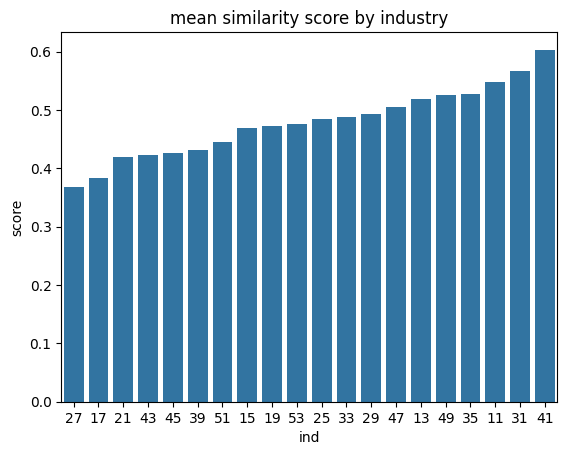

In [184]:
# get mean similarity score base on industry
mean_score = df.groupby("ind")["score"].mean()
#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
plt.title("mean similarity score by industry")

Text(0.5, 1.0, 'mean similarity score by job zone')

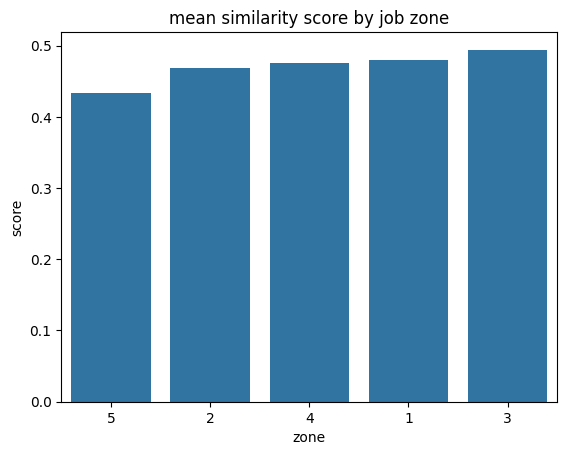

In [185]:
#plot similarity score by job zone
mean_score = df.groupby("zone")["score"].mean()
sns.barplot(mean_score, order=mean_score.sort_values().index)
plt.title("mean similarity score by job zone")

In [186]:
df[df["score"] == df["score"].max()]

,title,ref_task,ind,gen_task,parsed_response,score,matrix,ref_order,gen_order,code,zone
25,Insurance Sales Agents,[Customize insurance programs to suit individu...,41,"{'occupation': 'Insurance Sales Agent', 'tasks...",[Obtain customer information and details about...,0.60341,"[[0.6570760608, 0.58463943, 0.8426074386, 0.27...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[2, 9, 5, 6, 7, 13, 11, 4, 12, 1, 3, 10, 0, 8]",41-3021.00,4


Text(0.5, 1.0, 'similarity matrix of Insurance Claims and Policy Processing Clerks')

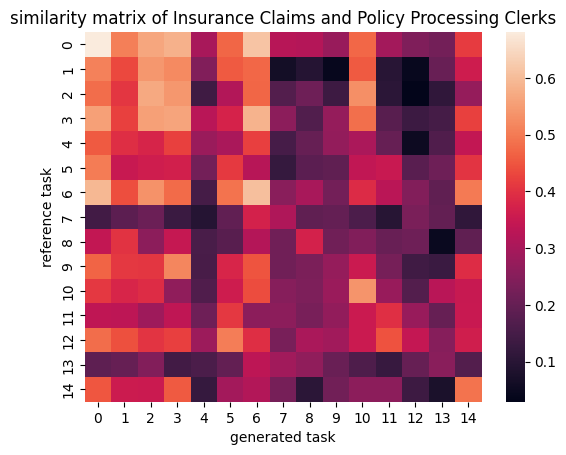

In [187]:
x = 26
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [188]:
df[df["score"] == df["score"].min()]

,title,ref_task,ind,gen_task,parsed_response,score,matrix,ref_order,gen_order,code,zone
5,Nanosystems Engineers,[Provide scientific or technical guidance or e...,17,"{'occupation': 'Nanosystems Engineer', 'tasks'...","[Design nanodevices, Conduct experiments, Anal...",0.302418,"[[0.3755821288, 0.32419982550000004, 0.2314451...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2, 3, 15, 7, 10, 1, 0, 12, 6, 14, 11, 9, 5, 1...",17-2199.09,5


Text(0.5, 1.0, 'similarity matrix of Industrial Engineers')

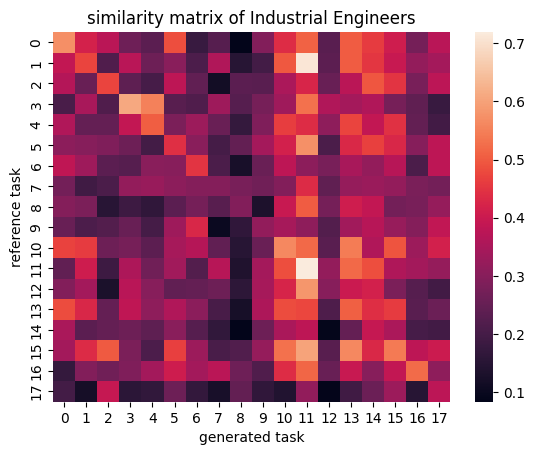

In [189]:
x = 6
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [193]:
#create a df dropping the rows with matrix shape not equal to (x, x)
df_test = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
#define a function to rearrange matrix based on gen_order
def rearrange_matrix(matrix, order):
    return matrix[:, order]
#apply the function to the matrix column
df_test["rearranged_matrix"] = df_test.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)



C:\Users\godfr\AppData\Local\Temp\ipykernel_34000\730366682.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["rearranged_matrix"] = df_test.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)


In [144]:
# find the best rearranged matrix
def is_diagonally_dominant(rearranged_matrix):
    D = np.abs(np.diag(rearranged_matrix))
    S = np.sum(np.abs(rearranged_matrix), axis=1) - D
    return np.all(D >= S)

def calculate_score(rearranged_matrix):
    score = 0
    for i in range(np.shape(rearranged_matrix)[0]):
        max_off_diagonal = max(abs(rearranged_matrix[i][j]) for j in range(np.shape(rearranged_matrix)[1]) if j != i)
        score += abs(rearranged_matrix[i][i]) - max_off_diagonal
    return score

def find_best_rearranged_matrix(df):
    best_score = -float('inf')
    best_index = None
    for index, row in df.iterrows():
        rearranged_matrix = row['rearranged_matrix']
        if is_diagonally_dominant(rearranged_matrix):
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
    if best_index is not None:
        return best_index, best_score
    else:
        # If no diagonally dominant rearranged_matrix found, consider all with highest score
        for index, row in df.iterrows():
            rearranged_matrix = row['rearranged_matrix']
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
        return best_index, best_score

In [147]:
# Example usage
index, score = find_best_rearranged_matrix(df_test)
if index is not None:
    print(f"The best rearranged_matrix is at index {index} with score {score}")
else:
    print("No suitable rearranged_matrix found.")

The best rearranged_matrix is at index 40 with score 0.3293544649000001


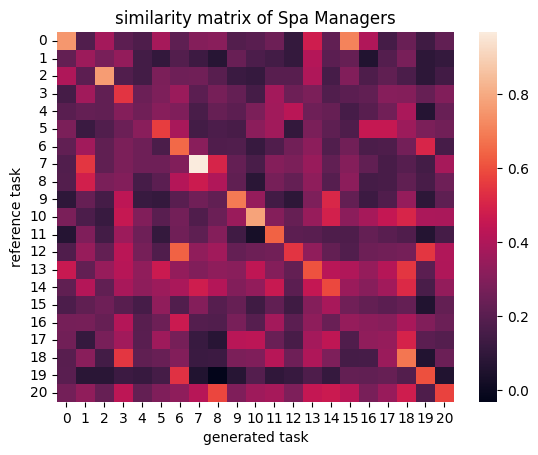

In [ ]:
x = index
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")